# Topic: Movie Analyzation

Group C Members:
MB955048 Chao Lok Kio Vicky;
MB955464 Lei Sin Ian Fio;
MB955473 Tou Ka Him Henry

#  Introduction
In this project, we are interested in analyzing the behaviour of movie selection of people. We have chosen some critical elements that are important to a movie selection for our analysis.  In our work, we have applied the techniques we have learnt in Python and some Python libraries to analyze and visualize the relationship of each element.


# Data Source

The Data Source is obtained from Kaggle:      movies_metadata.csv 
(https://www.kaggle.com/rounakbanik/the-movies-dataset)

# Import Libraries

We have make used of different libraries in our work: 

•	Numpy: it is a fundamental package for scientific computing with Python

•	Pandas: it is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language

•	Matplotlib.pyplot: it is a state-based interface to matplotlib and provides a MATLAB-like way of plotting

•	Ast (Literal_eval): it is used for safely evaluating strings containing Python expressions from untrusted sources without the need to parse the values oneself

•	Seaborn: a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics

•	Plotly: a Python library that is known for developing and providing online analytics, statistics and graphing tools


If Plotly is not installed, you need to run the following codes and install it first:

In [1]:
#import sys
#!conda install --yes --prefix {sys.prefix} plotly

In [2]:
#import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from ast import literal_eval
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True) 

# Import Datasets

This dataset contain a few csv files and we have just chosen two files for our analyzation after reading the description of each data set. Also, in one of our datasets, the column ID is different from the others, so when are importing the dataset, we have renamed the column ID and calculated the mean rating for each movie. 

Then, as we are using 2 csv files, we have merged these two files in our next step.

In [3]:
#dk=pd.read_csv("keywords.csv",low_memory=False)
#dc=pd.read_csv("credits.csv",low_memory=False)
dr=pd.read_csv("ratings.csv",low_memory=False)
dm=pd.read_csv("movies_metadata.csv",low_memory=False)

In [4]:
dr=dr.rename(columns={"movieId":"id"})
dr=dr.groupby('id').mean()
dr.head()

,userId,rating,timestamp
id,,,
1,135121.043616,3.888157,1.113440e+09
2,134877.953761,3.236953,1.088621e+09
3,136520.452733,3.175550,9.661124e+08
4,136249.536062,2.875713,9.390243e+08
5,135293.275855,3.079565,9.896788e+08


In [5]:
#merge files
data=pd.merge(dm,dr,on="id",how='left')
data.shape

(45466, 27)

# Data Cleaning

First, we have chosen the corresponding elements for our data analysis, then we need to check whether these columns contain any null values. Also, we have checked the datatypes for each column and we need to change the data type for "popularity", "budget", "vote_count", "vote_average" to "float64" and "release_date" to "datetime64[ns]".

In [6]:
data=data[['id','title','genres','budget','popularity',
           'release_date','revenue','rating','vote_count',
           'vote_average','overview','runtime','production_countries']]

In [7]:
data.dtypes

id                        int64
title                    object
genres                   object
budget                   object
popularity               object
release_date             object
revenue                 float64
rating                  float64
vote_count              float64
vote_average            float64
overview                 object
runtime                 float64
production_countries     object
dtype: object

In [8]:
data.dropna(subset=["popularity"],inplace=True)
data['popularity'] = pd.to_numeric(data['popularity'], errors='coerce')

In [9]:
data['budget'] = pd.to_numeric(data['budget'], errors='coerce')
data['budget'] = data['budget'].replace(0, np.nan)
data['revenue'] = data['revenue'].replace(0, np.nan)

In [10]:
data['release_date'] = pd.to_datetime(data['release_date'],format = '%Y-%m-%d', errors='coerce')

In [11]:
vote_counts = data[data['vote_count'].notnull()]['vote_count'].astype('int')
vote_averages = data[data['vote_average'].notnull()]['vote_average'].astype('int')

For the data in "genres" and "production_countries", as they are presented in dictionaries in list, we have applied the following codes to get back the values of dictionaries.

In [12]:
def get_values(data_str):
    if isinstance(data_str, float):
        pass
    else:
        values = []
        data_str = ast.literal_eval(data_str)
        if isinstance(data_str, list):
            for k_v in data_str:
                values.append(k_v['name'])
            return values
        else:
            return None

In [13]:
data[['genres','production_countries']] = data[['genres','production_countries']].applymap(get_values)

Lastly, we check the data types once again and see whether the data types match our expecations or not.

In [14]:
data.dtypes

id                               int64
title                           object
genres                          object
budget                         float64
popularity                     float64
release_date            datetime64[ns]
revenue                        float64
rating                         float64
vote_count                     float64
vote_average                   float64
overview                        object
runtime                        float64
production_countries            object
dtype: object

#### Finally, a cleaned dataset is obtained:

In [15]:
data.sort_values(by="release_date").head()

,id,title,genres,budget,popularity,release_date,revenue,rating,vote_count,vote_average,overview,runtime,production_countries
34940,315946,Passage of Venus,[Documentary],NaN,0.480371,1874-12-09,NaN,NaN,19.0,6.0,Photo sequence of the rare transit of Venus ov...,1.0,[France]
34937,194079,Sallie Gardner at a Gallop,[Documentary],NaN,0.327841,1878-06-14,NaN,NaN,25.0,6.2,Sallie Gardner at a Gallop was one of the earl...,1.0,[United States of America]
41602,426903,Buffalo Running,[Documentary],NaN,0.229221,1883-11-19,NaN,NaN,7.0,5.4,Individual photographs of the running of a buf...,1.0,[United States of America]
34933,159897,Man Walking Around a Corner,[Documentary],NaN,1.184891,1887-08-18,NaN,NaN,17.0,4.1,The last remaining production of Le Prince's L...,1.0,[United States of America]
34934,96882,Accordion Player,[Documentary],NaN,0.212768,1888-01-01,NaN,NaN,18.0,4.4,The last remaining film of Le Prince's LPCCP T...,1.0,[United Kingdom]


# Analysis

### The Correlations Between Elements:

In [16]:
data['profit'] = data['revenue'] -data['budget']

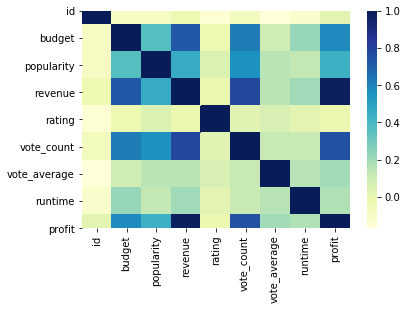

In [17]:
sns.heatmap(data.corr(), cmap = 'YlGnBu')

From the above graph, we have found out that budget, revenue, profit and vote_count are correlated. It states that the higher budget movies can result in a higher revenue, but it doesn't represent that they have a high rating as the vote_count is not correlated with the ratings.

### Top 10 Movie Types:

In [18]:
def counting_values(df, column):
    value_count = {}
    for row in df[column].dropna():
        if len(row) > 0:
            for key in row:
                if key in value_count:
                    value_count[key] += 1
                else:
                    value_count[key] = 1
        else:
            pass
    return value_count

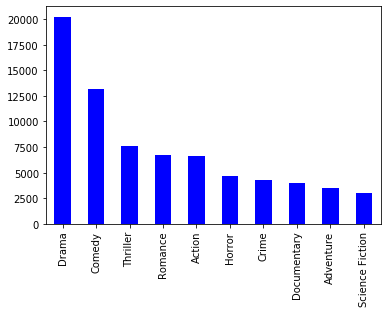

In [19]:
genres_count = pd.Series(counting_values(data, 'genres'))
genres_count.sort_values(ascending = False).head(10).plot(kind = 'bar',color='blue')


From the above graph, we have found out the most common movie types that are being produced and Drama is the most favorite among all types of movie.

### Movies Around the World:

In [20]:
countries = pd.Series(counting_values(data, 'production_countries'))
ln_countries = pd.Series(np.log(countries.values), index = countries.index)

In [23]:
data1 = dict(type = 'choropleth',
           locations = ln_countries.index,
           locationmode = 'country names',
           colorscale = 'Blackbody',
           text = countries.values,
           z = ln_countries.values,
           colorbar = {'title': 'log of Sum of Movies'})

layout = dict(title = 'Movies around the World',
             geo = dict(showframe = False,
                       projection = {'type': 'natural earth'}))

choromap = go.Figure(data = [data1],layout = layout)
iplot(choromap,validate=False)


From the above graph, we have found out the number of movies produced in each country and America has the greatest number of movies produced.

### Top 10 popular movies:

Text(0.5, 1.0, 'Popular Movies')

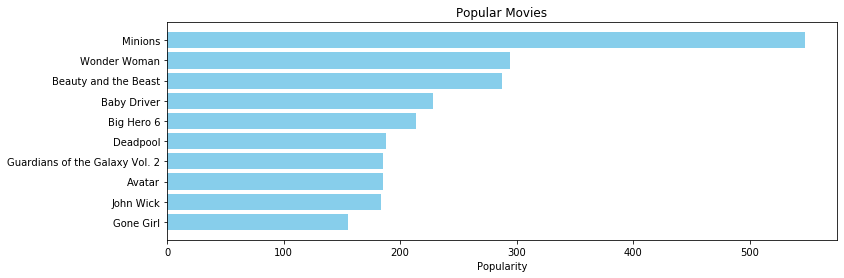

In [22]:
pop= data.astype({'popularity':'float64'}).sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(10),pop['popularity'].head(10), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

From the above graph, we have found out the most top 10 popular movies.

# Conclusion

To conclude, we have made use of the past data to analyze and visualize the behaviour of movie selection of people and we can keep update with the live data so as the movie producer can choose what types of movie they will produce in the future.

# Future Studying

As our computer science skills are limited, we suggest that some future work can be done with improved techniques:

•	We can keep update with the live data as the dataset that we have now is limited to the current and past data; 

•	We can analyze the information on the actors and crew so as to produce the best movie for people;

•	The behaviour of movie selection can be personalized and tailor-made from the past habits of each person.
